In [76]:
!pip install numpy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df_TorRes= pd.read_csv('yelp_rev_TorRes.csv')
df_TorRes.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,text,date
0,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",aAd2DWIgvVLc2TeU8yve9A,5,Delicious delicous declicous!! It is my go-to ...,2017-10-02 02:15:29
1,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",Zr535e3501Ygs4hO5hO05Q,4,"As a Vietnamese person, I highly recommend thi...",2017-08-16 06:04:43
2,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",20xtru4h_7TjFn4lSHmSsg,5,Been going to Mi Mi Restaurant for years! I lo...,2017-10-11 02:31:33
3,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",wh9v2dIpOxm6W2mwoEnvPg,5,Our go-to place for Vietnamese food! This plac...,2016-05-19 17:38:23
4,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",222kqiACWSwnpcxC0AaxFA,5,I honestly think that anyone would enjoy food ...,2015-11-06 04:37:18


In [4]:
#Checking datatypes
df_TorRes.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
attributes       object
categories       object
user_id          object
review_stars      int64
text             object
date             object
dtype: object

In [5]:
df_TorRes.drop('latitude',inplace=True,axis = 1)

In [6]:
df_TorRes.drop('longitude',inplace=True,axis = 1)

In [7]:
df_TorRes.drop('user_id',inplace=True,axis = 1)

In [8]:
df_TorRes.head()

,business_id,name,address,city,state,postal_code,stars,attributes,categories,review_stars,text,date
0,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",5,Delicious delicous declicous!! It is my go-to ...,2017-10-02 02:15:29
1,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",4,"As a Vietnamese person, I highly recommend thi...",2017-08-16 06:04:43
2,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",5,Been going to Mi Mi Restaurant for years! I lo...,2017-10-11 02:31:33
3,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",5,Our go-to place for Vietnamese food! This plac...,2016-05-19 17:38:23
4,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",5,I honestly think that anyone would enjoy food ...,2015-11-06 04:37:18


In [9]:
# Categorize Restaurants with respect to ethnicity. 
df_TorRes.is_copy=False
df_TorRes['category']=pd.Series(dtype='object')
df_TorRes.loc[df_TorRes.categories.str.contains('Chinese'),'category'] = 'East Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Hong Kong'),'category'] = 'East Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Japanese'),'category'] = 'East Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Korean'),'category'] = 'East Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Taiwanese'),'category'] = 'East Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('European'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('British'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('German'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('French'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Italian'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Swiss'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Russian'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Ukrainian'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Polish'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Greek'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Portuguese'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Hungarian'), 'category'] = 'European'
df_TorRes.loc[df_TorRes.categories.str.contains('Indian'), 'category'] = 'South Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Pakistani'), 'category'] = 'South Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Bangladeshi'), 'category'] = 'South Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Sri Lankan'), 'category'] = 'South Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Afghan'), 'category'] = 'South Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Nepalese'), 'category'] = 'South Asian'
df_TorRes.loc[df_TorRes.categories.str.contains('Latin American'), 'category'] = 'Latin American'
df_TorRes.loc[df_TorRes.categories.str.contains('Brazilian'), 'category'] = 'Latin American'
df_TorRes.loc[df_TorRes.categories.str.contains('Argentine'), 'category'] = 'Latin American'
df_TorRes.loc[df_TorRes.categories.str.contains('Colombian'), 'category'] = 'Latin American'
df_TorRes.loc[df_TorRes.categories.str.contains('Mexican'), 'category'] = 'Latin American'
df_TorRes.loc[df_TorRes.categories.str.contains('Peruvian'), 'category'] = 'Latin American'
df_TorRes.loc[df_TorRes.categories.str.contains('Cuban'), 'category'] = 'Latin American'
df_TorRes.loc[df_TorRes.categories.str.contains('Middle Eastern'), 'category'] = 'Middle Eastern'
df_TorRes.loc[df_TorRes.categories.str.contains('Turkish'), 'category'] = 'Middle Eastern'
df_TorRes.loc[df_TorRes.categories.str.contains('Egyptian'), 'category'] = 'Middle Eastern'
df_TorRes.loc[df_TorRes.categories.str.contains('Lebanese'), 'category'] = 'Middle Eastern'
df_TorRes.loc[df_TorRes.categories.str.contains('Syrian'), 'category'] = 'Middle Eastern'
df_TorRes.loc[df_TorRes.categories.str.contains('Iranian'), 'category'] = 'Middle Eastern'
df_TorRes.loc[df_TorRes.categories.str.contains('Arabian'), 'category'] = 'Middle Eastern'
df_TorRes.loc[df_TorRes.categories.str.contains('African'),'category'] = 'African'
df_TorRes.loc[df_TorRes.categories.str.contains('South African'),'category'] = 'African'
df_TorRes.loc[df_TorRes.categories.str.contains('Ethiopian'),'category'] = 'African'
df_TorRes.category[1000:]

1000             African
1001      Middle Eastern
1002      Middle Eastern
1003      Middle Eastern
1004      Middle Eastern
               ...      
338358               NaN
338359               NaN
338360        East Asian
338361               NaN
338362               NaN
Name: category, Length: 337363, dtype: object

In [10]:
df_TorRes.head()

,business_id,name,address,city,state,postal_code,stars,attributes,categories,review_stars,text,date,category
0,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",5,Delicious delicous declicous!! It is my go-to ...,2017-10-02 02:15:29,NaN
1,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",4,"As a Vietnamese person, I highly recommend thi...",2017-08-16 06:04:43,NaN
2,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",5,Been going to Mi Mi Restaurant for years! I lo...,2017-10-11 02:31:33,NaN
3,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",5,Our go-to place for Vietnamese food! This plac...,2016-05-19 17:38:23,NaN
4,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,4.0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Vietnamese, Restaurants",5,I honestly think that anyone would enjoy food ...,2015-11-06 04:37:18,NaN


In [11]:
df_TorRes.category.value_counts()

East Asian        78419
European          51299
Latin American    20170
Middle Eastern    14933
South Asian       10862
African            2115
Name: category, dtype: int64

In [12]:
## drop null values in category, delete original column categories and reset the index
df_TorRes=df_TorRes.dropna(axis=0, subset=['category'])
del df_TorRes['categories']
df_TorRes=df_TorRes.reset_index(drop=True)
df_TorRes.head(10)

,business_id,name,address,city,state,postal_code,stars,attributes,review_stars,text,date,category
0,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",3,Mi'Hito is a new poke/sushi burrito chain that...,2017-11-18 23:09:27,East Asian
1,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",5,"They have amazing tacos (shrimp tempura), and ...",2017-12-29 20:58:49,East Asian
2,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",5,"Wow, this place is seriously magnificent. This...",2017-08-29 20:01:35,East Asian
3,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",4,"I usually don't like the poke/sushirrito fad, ...",2017-07-19 01:47:24,East Asian
4,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",5,I appreciated the unique items like sushi taco...,2017-07-19 19:21:33,East Asian
5,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",4,A new sushi burrito spot in Kensington area (s...,2017-05-16 20:01:12,East Asian
6,37kk0IW6jL7ZlxZF6k2QBg,Edulis,169 Niagara Street,Toronto,ON,M5V,4.0,"{'RestaurantsGoodForGroups': 'False', 'Restaur...",3,well.... I think I was expecting a lot more fo...,2013-06-24 19:17:03,European
7,37kk0IW6jL7ZlxZF6k2QBg,Edulis,169 Niagara Street,Toronto,ON,M5V,4.0,"{'RestaurantsGoodForGroups': 'False', 'Restaur...",2,"Huge hype, disappointing results. Perhaps they...",2014-05-07 21:42:20,European
8,37kk0IW6jL7ZlxZF6k2QBg,Edulis,169 Niagara Street,Toronto,ON,M5V,4.0,"{'RestaurantsGoodForGroups': 'False', 'Restaur...",5,"The food & experience was wonderful. But, skip...",2014-07-13 14:21:54,European
9,37kk0IW6jL7ZlxZF6k2QBg,Edulis,169 Niagara Street,Toronto,ON,M5V,4.0,"{'RestaurantsGoodForGroups': 'False', 'Restaur...",5,"Without understatement, dining here for my mot...",2018-03-24 16:16:24,European


In [13]:
plt.style.use('ggplot')

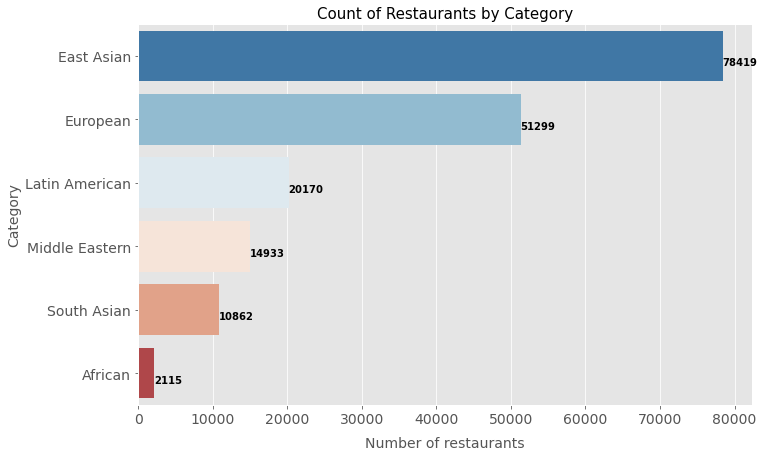

In [16]:
plt.figure(figsize=(11,7))
grouped = df_TorRes.category.value_counts()
sns.countplot(y='category',data=df_TorRes, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(df_TorRes.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=10)

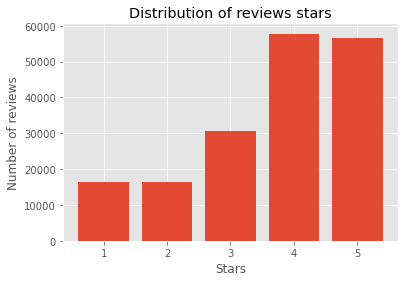

In [14]:
# The Stars distribution 
values, counts = np.unique(df_TorRes['review_stars'], return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of reviews stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()

In [17]:
# Label=0 (bad review), Label=1 (good review)
df_TorRes['Label'] = df_TorRes['review_stars'].replace({1: 0,2: 0,3:0,4:1,5:1})

In [18]:
df_TorRes.head()

,business_id,name,address,city,state,postal_code,stars,attributes,review_stars,text,date,category,Label
0,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",3,Mi'Hito is a new poke/sushi burrito chain that...,2017-11-18 23:09:27,East Asian,0
1,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",5,"They have amazing tacos (shrimp tempura), and ...",2017-12-29 20:58:49,East Asian,1
2,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",5,"Wow, this place is seriously magnificent. This...",2017-08-29 20:01:35,East Asian,1
3,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",4,"I usually don't like the poke/sushirrito fad, ...",2017-07-19 01:47:24,East Asian,1
4,TKKX9bllRBMzp0NYr441PQ,Mi'Hito Sushi Laboratory,285 College Street,Toronto,ON,M5T 1S2,4.0,"{'Caters': 'False', 'HasTV': 'True', 'Restaura...",5,I appreciated the unique items like sushi taco...,2017-07-19 19:21:33,East Asian,1


In [19]:
# Picking the only text and target column
df_final=df_TorRes[['text', 'Label']]

In [20]:
df_final.head()

,text,Label
0,Mi'Hito is a new poke/sushi burrito chain that...,0
1,"They have amazing tacos (shrimp tempura), and ...",1
2,"Wow, this place is seriously magnificent. This...",1
3,"I usually don't like the poke/sushirrito fad, ...",1
4,I appreciated the unique items like sushi taco...,1


# **Word Cloud**
As a word cloud is a graphical representation of frequently used words in the texts so we are going to investigate the frequency of words in the reviews.

In [26]:
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud
from os import path
from PIL import Image
# Dividing the reviews to positive and negative
pos = df_final[df_final['Label']==1]['text']
neg = df_final[df_final['Label']==0]['text']

**Positive review word cloud we can indicate the frequency of occurrence of the word in the Positive reviews or compliments. We can see some interesting words like “quarantined” in positive reviews.**

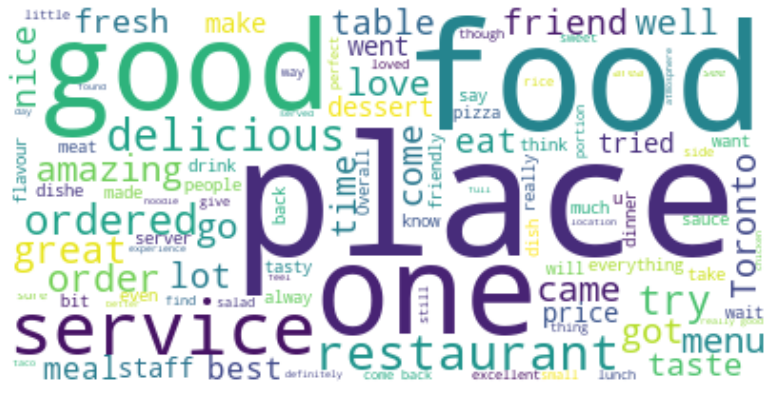

In [27]:
text_pos = " ".join(i for i in pos)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100,contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

**Negative review word cloud Using word cloud to show the frequency of words in negative reviews or complains.**

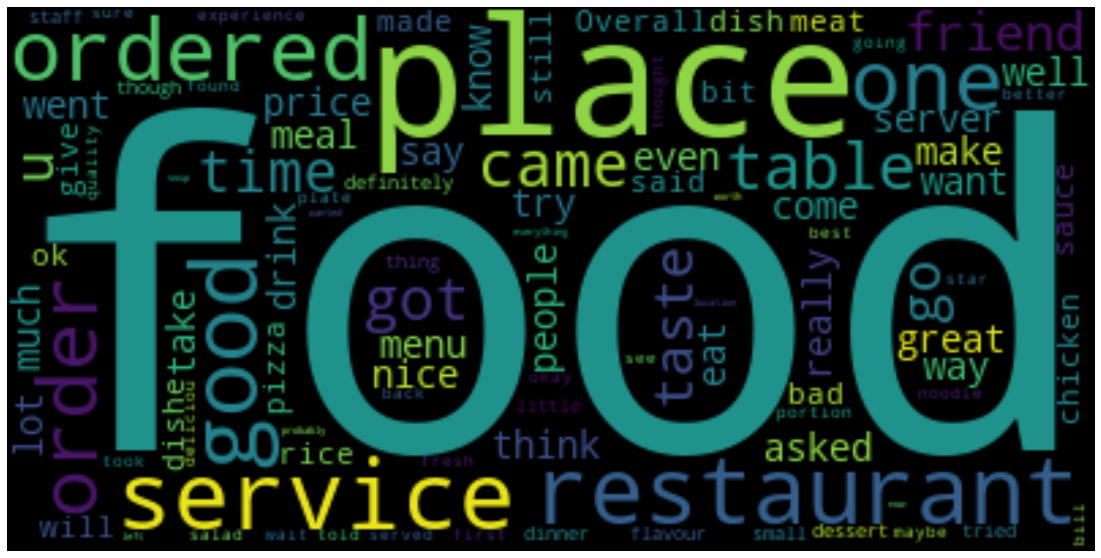

In [23]:
# Create a word cloud image
text_neg = " ".join(i for i in neg)

wc_neg = WordCloud(background_color="black", max_words=100, contour_width=10,contour_color='firebrick', max_font_size=300)

# Generate a wordcloud
wc_neg.generate(text_neg)

plt.figure(figsize=(20,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Split the data into train and test set**
In order to train the classifier, we need to divide the dataset into train and test datasets. So we are going to split the reviews by 80:20 for train and test data. Before splitting the data, we create the function_clean to clean up reviews.

In [21]:
import re 
def function_clean(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)   
    return text

In [22]:
# applying the cleaning function to text column
df_final['text'] = df_final['text'].apply(lambda text: function_clean(text))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
#Splitting the data to train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final["text"]
y = df_final["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [24]:
y.value_counts()

1    114362
0     63436
Name: Label, dtype: int64

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142238,), (35560,), (142238,), (35560,))

# **Preprocessing the data**
**Now we are going to preprocess the reviews because all these modifications will directly affect the classifier’s performance. As we are going to use words as features so we can use some text formatting techniques which will help us in feature extraction including removing punctuation marks/digits ,and also stop-words. In addition, the implementation of lemmatization words using NLTK can be workable to maximize the performance. Tokenization is the last step to break reviews up into words and other meaningful tokens.**

In [26]:
import string
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):

    listofwords = sentence.strip().split()          # to remove any space from beginning and the end of text
    listof_words = []    
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '').lower()
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Vectorizing the text using TF_IDF**
**By implementing the sklearn library, we can use TF_IDF vectorizing to find the weighted words that occur more frequently in the document that leads to creation of the bag of words model. So our features will be the words or sequence of words of these reviews. We are going to explore different models with the combinations of n_grams (unigrams,bigrams,trigrams).**

In [27]:
!pip install -U numpy
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

vect_1 = TfidfVectorizer(min_df=100, tokenizer=my_tokenizer, stop_words={'english'}, ngram_range=(1,1)).fit(X_train)
X_train1 = vect_1.transform(X_train)
X_test1 = vect_1.transform(X_test)

Requirement already up-to-date: numpy in /opt/conda/lib/python3.7/site-packages (1.20.1)


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [32]:
#counting most repetitive words 
word_counts = np.array(np.sum(X_train1, axis=0)).reshape((-1,))
words = np.array(vect_1.get_feature_names())
words_df = pd.DataFrame({"word":words, "count":word_counts})
words_df.sort_values(by="count",ascending=False).head(25)

,word,count
1861,food,5714.979023
2032,good,4908.398643
3491,place,4571.144260
2071,great,4132.171504
4140,service,3783.596565
3777,really,3010.078694
2704,like,2986.588803
827,chicken,2924.042189
3889,restaurant,2801.166056
3218,one,2746.581655


# **Modeling**
**As the sentiment-classifier system has many applications from business to social sciences, the natural language processing and machine learning techniques are used to create the classifiers in order to explore the polarity of the reviews easily. Hence, we analyze the reviews given by the customers for the restaurant with the implementation of Logistic Regression.**
## Logistics Regression

In [49]:
# fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Fitting Logistic regression to the training set
logreg = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1)
logreg.fit(X_train1, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test1)

# Training score
print(f"Score on training set: {logreg.score(X_train1,y_train)}")
print(f"Score on test set: {logreg.score(X_test1,y_test)}")

Score on training set: 0.8846018644806591
Score on test set: 0.8758155230596175


In [101]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics
print('The Confusion Matrix')
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr)
print('The Classification report')
print(metrics.classification_report(y_test, y_pred_logreg))

The Confusion Matrix


,Predicted 0,Predicted 1
True 0,9945,2715
True 1,1701,21199


The Classification report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     12660
           1       0.89      0.93      0.91     22900

    accuracy                           0.88     35560
   macro avg       0.87      0.86      0.86     35560
weighted avg       0.87      0.88      0.87     35560



# **Testing**
**In this stage, after creating the classification models, now we can use them to predict the sentiment of the restaurant reviews.**

# **(Negative review):**
**"The Service was so bad."**

In [103]:
input_string = "The Service was so bad."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logreg.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string: The Service was so bad.
Logistic Regression model: [0]


**"The Waiting time was so long."**

In [104]:
input_string = "The Waiting time was so long."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logreg.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string: The Waiting time was so long.
Logistic Regression model: [0]


# **(Positive Reviews):**
**"The Taste was so delicious."**

In [105]:
input_string = "The Taste was so delicious."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logreg.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string: The Taste was so delicious.
Logistic Regression model: [1]


**"The Staff was friendly , I do recommend this Middle Eastern cuisine."**

In [106]:
input_string = "The Staff was friendly , I do recommend this Middle Eastern cuisine."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logreg.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string: The Staff was friendly , I do recommend this Middle Eastern cuisine.
Logistic Regression model: [1]
